# import libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

# seed for reproducibility

In [23]:
np.random.seed(0)

# generate data

In [24]:
dogs_whisker_length= np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index= np.random.normal(loc=8,scale=1,size=10)

In [25]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [26]:
dogs_ear_flappiness_index

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

In [27]:
cats_whisker_length = np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index = np.random.normal(loc=5,scale=1,size=10)

In [28]:
cats_whisker_length

array([ 5.44701018,  8.6536186 ,  8.8644362 ,  7.25783498, 10.26975462,
        6.54563433,  8.04575852,  7.81281615,  9.53277921,  9.46935877])

In [29]:
cats_ear_flappiness_index

array([5.15494743, 5.37816252, 4.11221425, 3.01920353, 4.65208785,
       5.15634897, 6.23029068, 6.20237985, 4.61267318, 4.69769725])

# visualize data points

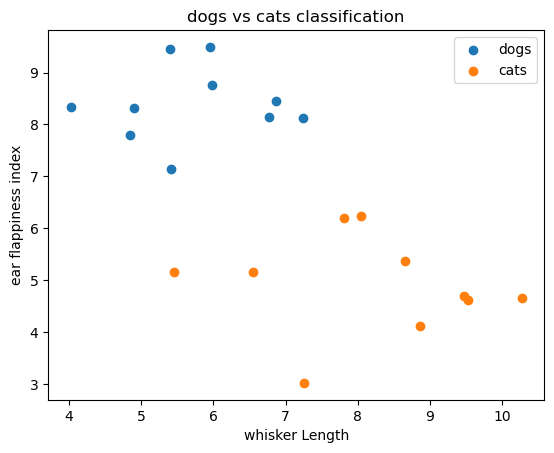

In [30]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label="dogs")
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label="cats")
plt.xlabel("whisker Length")
plt.ylabel("ear flappiness index")
plt.title("dogs vs cats classification")
plt.legend()
plt.show()

# intiliaze the algorithm

In [31]:
def random_linear_classifier(data_dogs,data_cats,k,d):
    best_error=0
    best_theta=None
    best_theta0=None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()
        error = compute_error(theta,theta0)
        
        if best_error < error:
            best_error= error
            best_theta0 = theta0
            best_theta = theta

    return best_theta, best_theta0


# compute error

In [32]:
def compute_error(data_dogs,data_cats,theta,theta0):
    error =0

    for x_dog in data_dogs:
        if np.dot(theta,x_dog)+theta0 <= 0 :
            error+=1
        
    for x_cat in data_cats:
        if np.dot(theta,x_cat)+theta0 > 0 :
            error +=1

    return error

# Combine data

In [33]:
dogs_data = np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T

data = np.vstack((dogs_data,cats_data))
labels = np.hstack((np.zeros(len(dogs_data)),np.ones(len(cats_data))))

In [34]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [35]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [36]:
data

array([[ 6.76405235,  8.14404357],
       [ 5.40015721,  9.45427351],
       [ 5.97873798,  8.76103773],
       [ 7.2408932 ,  8.12167502],
       [ 6.86755799,  8.44386323],
       [ 4.02272212,  8.33367433],
       [ 5.95008842,  9.49407907],
       [ 4.84864279,  7.79484174],
       [ 4.89678115,  8.3130677 ],
       [ 5.4105985 ,  7.14590426],
       [ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [37]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

# Split data into training and testing sets

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [39]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

In [42]:
Y_test

array([0., 1., 1., 0.])

In [43]:
X_train

array([[ 4.89678115,  8.3130677 ],
       [ 4.02272212,  8.33367433],
       [ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

In [44]:
Y_train

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.])

# visualize the data 

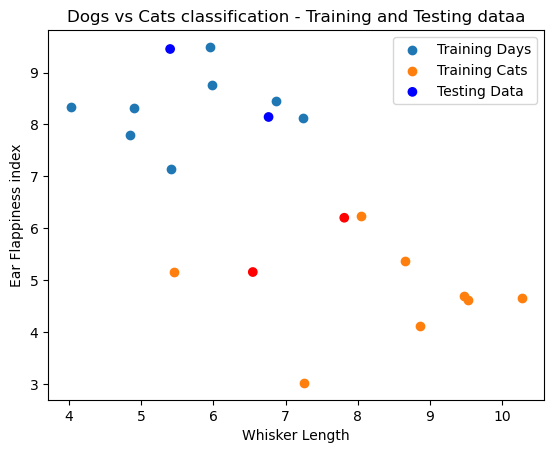

In [48]:
plt.scatter(X_train[Y_train==0][:,0],X_train[Y_train==0][:,1], label='Training Days')
plt.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],label="Training Cats")
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test,cmap='bwr',label="Testing Data")
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness index")
plt.title("Dogs vs Cats classification - Training and Testing dataa")
plt.legend()
plt.show()